In [4]:
import pandas as pd

# Carregar o arquivo Excel
caminho_arquivo = r"C:\Users\luish\OneDrive\Área de Trabalho\FIAP\FASE 05\ITEM 1.3\vendas_linha_petshop_2020_2024.xlsx"
df = pd.read_excel(caminho_arquivo)

# Visualizar as primeiras linhas do dataframe
df.head()


,cod_pedido,regiao_pais,produto,valor,quantidade,valor_total_bruto,data,estado,formapagto,centro_distribuicao,responsavelpedido,valor_comissao,lucro_liquido,categoriaprod
0,50284,Norte,Biscoito True Champion 300g,"24,64",2,"49,28",2020-03-12,Acre,Cartão Crédito,Rapid Pink,Carlos,"1,76","26,4",Alimentação
1,50285,Norte,Biscoito True Champion 300g,"23,52",2,"47,04",2020-04-10,Amapá,Cartão Crédito,Rapid Pink,Maria Linda,"1,68","25,2",Alimentação
2,50286,Norte,Biscoito True Champion 300g,"24,64",4,"98,56",2020-08-07,Pará,Dinheiro,Rapid Pink,Julia,"3,52","52,8",Alimentação
3,50287,Norte,Biscoito True Champion 300g,"21,28",4,"85,12",2020-01-10,Rondônia,Pix,Rapid Pink,Yuri,"3,04","45,6",Alimentação
4,50288,Norte,Biscoito True Champion 300g,"24,64",,"49,28",2020-04-11,Tocantins,Cartão Crédito,Rapid Pink,Dolores,"1,76","26,4",Alimentação


In [5]:
# Lista de colunas relevantes
colunas_relevantes = ['valor', 'quantidade', 'valor_total_bruto', 'valor_comissao', 'lucro_liquido']

# Verificar se as colunas existem no DataFrame
colunas_existentes = [coluna for coluna in colunas_relevantes if coluna in df.columns]
colunas_existentes


['valor', 'quantidade', 'valor_total_bruto', 'valor_comissao', 'lucro_liquido']

In [6]:
# Verificar o tipo de dado das colunas relevantes
tipos_colunas = df[colunas_existentes].dtypes
print("Tipos de dados antes da conversão:")
print(tipos_colunas)

# Converter colunas para tipo numérico (se necessário)
df[colunas_existentes] = df[colunas_existentes].apply(pd.to_numeric, errors='coerce')

# Verificar novamente os tipos de dados após a conversão
tipos_colunas_convertidos = df[colunas_existentes].dtypes
print("Tipos de dados após a conversão:")
print(tipos_colunas_convertidos)


Tipos de dados antes da conversão:
valor                object
quantidade           object
valor_total_bruto    object
valor_comissao       object
lucro_liquido        object
dtype: object
Tipos de dados após a conversão:
valor                float64
quantidade           float64
valor_total_bruto    float64
valor_comissao       float64
lucro_liquido        float64
dtype: object


In [7]:
# Função para calcular outliers usando IQR
def identificar_outliers_iqr(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]
    return outliers.shape[0]

# Contar o número de outliers em cada coluna relevante
outliers_contagem = {coluna: identificar_outliers_iqr(df, coluna) for coluna in colunas_existentes}
outliers_contagem


{'valor': 13558,
 'quantidade': 4700,
 'valor_total_bruto': 10345,
 'valor_comissao': 347,
 'lucro_liquido': 2799}

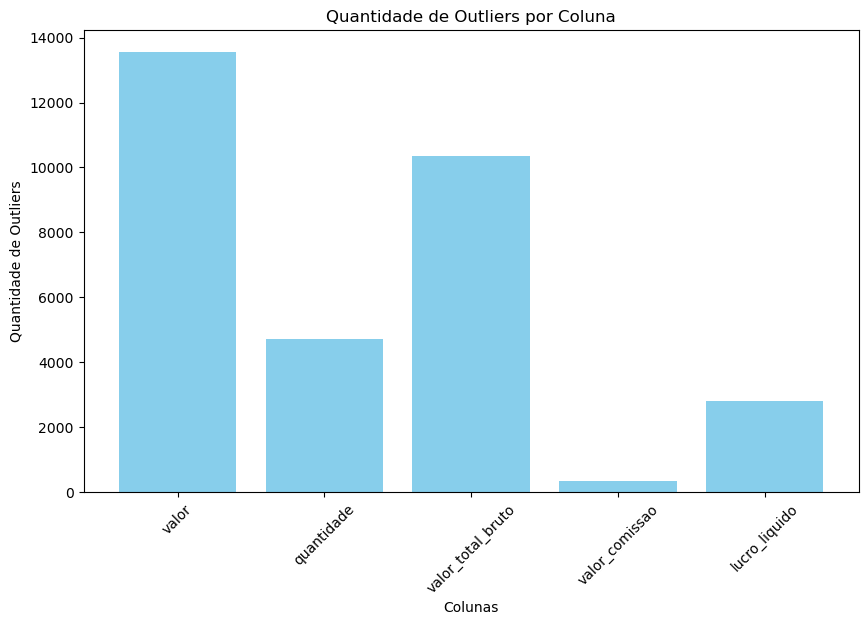

In [8]:
import matplotlib.pyplot as plt

# Dados para o gráfico
colunas = list(outliers_contagem.keys())
quantidade_outliers = list(outliers_contagem.values())

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(colunas, quantidade_outliers, color='skyblue')
plt.xlabel('Colunas')
plt.ylabel('Quantidade de Outliers')
plt.title('Quantidade de Outliers por Coluna')
plt.xticks(rotation=45)
plt.show()


1. Identificação das Colunas Relevantes
Primeiramente, selecionamos as colunas relevantes do DataFrame que contêm dados numéricos e que são de interesse para a análise de outliers. Neste caso, as colunas selecionadas foram: valor, quantidade, valor_total_bruto, valor_comissao, e lucro_liquido.
2. Verificação e Conversão para Tipo Numérico
Antes de proceder com a identificação de outliers, verificamos se essas colunas estavam no tipo de dado correto (numérico). Caso as colunas estivessem em outro tipo (como object), realizamos a conversão para tipo numérico usando a função pd.to_numeric(). Essa conversão é essencial para garantir que as operações matemáticas necessárias para identificar outliers possam ser realizadas corretamente.
3. Cálculo dos Outliers Usando IQR
Utilizamos o Interquartile Range (IQR), que é uma medida estatística da dispersão dos dados, para identificar outliers:
Q1 (Primeiro Quartil): O valor que delimita os 25% menores valores do conjunto de dados.
Q3 (Terceiro Quartil): O valor que delimita os 25% maiores valores do conjunto de dados.
IQR: A diferença entre Q3 e Q1, representando a amplitude interquartil.
Limites Inferior e Superior: Calculamos os limites inferior (Q1 - 1.5 * IQR) e superior (Q3 + 1.5 * IQR). Qualquer valor fora desse intervalo foi considerado um outlier.
4. Contagem de Outliers
Para cada coluna relevante, calculamos quantos valores estavam abaixo do limite inferior ou acima do limite superior, e essa contagem foi armazenada em um dicionário.
5. Visualização Gráfica
Para facilitar a interpretação dos resultados, criamos um gráfico de barras que exibe a quantidade de outliers em cada coluna relevante. Esse gráfico permite uma visualização clara da distribuição dos outliers e ajuda a identificar rapidamente quais colunas têm maior incidência de valores atípicos.
Conclusão
A estratégia baseada no IQR é eficaz porque é menos influenciada por outliers do que outras medidas, como a média e o desvio padrão. Isso torna o IQR uma ferramenta confiável para detectar outliers em conjuntos de dados, especialmente quando há a possibilidade de valores extremos influenciar os resultados.
Essa abordagem garantiu uma análise sistemática e robusta dos dados, proporcionando uma visão clara sobre a presença de outliers nas colunas numéricas do dataset.